<center><font size = "10"> Week 12 - Network Simulation III<center>
<center><font size = "8">Tutorial 02: Position and distance based connectivity <center>

<font size='5'><font color='red'>__IMPORTANT!!__ Read the document "ReadBefore.pdf" before running this tutorial or any of the week 12 tutorials

<font size='3'><font color='blue'>In The following tutorial we will see how to spatially separate populations, add inhibitory populations, and implement weights, probabilities of connection and delays that depend on cell positions or distances using __NetPyNe__.

<font size='3'><font color='blue'>We will build a __cortical-like network__ with 6 populations (3 excitatory and 3 inhibitory) distributed in 3 layers: 2/3, 4 and 5. 

## Step 1: Import
<font size='3'>Import the __sim__ and __specs__ modules from the __netpyne__ package, that provide functions to easily create and simulate networks.

In [1]:
from netpyne import specs, sim

%matplotlib inline

## Step 2: Define network parameters - dimensions

In [2]:
# Network parameters
netParams = specs.NetParams()  # object of class NetParams to store the network parameters

netParams.sizeX = 100 # x-dimension (horizontal length) size in um
netParams.sizeY = 1000 # y-dimension (vertical height or cortical depth) size in um
netParams.sizeZ = 100 # z-dimension (horizontal length) size in um
netParams.propVelocity = 100.0 # propagation velocity (um/ms)
netParams.probLengthConst = 150.0 # length constant for conn probability (um)

### 2.1 Define cell populations

In [3]:
## Population parameters
netParams.popParams['E2'] = {'cellType': 'E', 'numCells': 50, 'yRange': [100,300], 'cellModel': 'HH'}
netParams.popParams['I2'] = {'cellType': 'I', 'numCells': 50, 'yRange': [100,300], 'cellModel': 'HH'}
netParams.popParams['E4'] = {'cellType': 'E', 'numCells': 50, 'yRange': [300,600], 'cellModel': 'HH'}
netParams.popParams['I4'] = {'cellType': 'I', 'numCells': 50, 'yRange': [300,600], 'cellModel': 'HH'}
netParams.popParams['E5'] = {'cellType': 'E', 'numCells': 50, 'ynormRange': [0.6,1.0], 'cellModel': 'HH'}
netParams.popParams['I5'] = {'cellType': 'I', 'numCells': 50, 'ynormRange': [0.6,1.0], 'cellModel': 'HH'}

### 2.2 Define cell morphologies and physiology

In [4]:
## Cell property rules
cellRule = {'conds': {'cellType': 'E'},  'secs': {}}  # cell rule dict
cellRule['secs']['soma'] = {'geom': {}, 'mechs': {}}                              # soma params dict
cellRule['secs']['soma']['geom'] = {'diam': 15, 'L': 14, 'Ra': 120.0}                   # soma geometry
cellRule['secs']['soma']['mechs']['hh'] = {'gnabar': 0.13, 'gkbar': 0.036, 'gl': 0.003, 'el': -70}      # soma hh mechanism
netParams.cellParams['Erule'] = cellRule                          # add dict to list of cell params

cellRule = {'conds': {'cellType': 'I'},  'secs': {}}  # cell rule dict
cellRule['secs']['soma'] = {'geom': {}, 'mechs': {}}                              # soma params dict
cellRule['secs']['soma']['geom'] = {'diam': 10.0, 'L': 9.0, 'Ra': 110.0}                  # soma geometry
cellRule['secs']['soma']['mechs']['hh'] = {'gnabar': 0.11, 'gkbar': 0.036, 'gl': 0.003, 'el': -70}      # soma hh mechanism
netParams.cellParams['Irule'] = cellRule                          # add dict to list of cell params

### 2.3 Define synaptic mechanism

In [5]:
## Synaptic mechanism parameters
netParams.synMechParams['exc'] = {'mod': 'Exp2Syn', 'tau1': 0.8, 'tau2': 5.3, 'e': 0}  # NMDA synaptic mechanism
netParams.synMechParams['inh'] = {'mod': 'Exp2Syn', 'tau1': 0.6, 'tau2': 8.5, 'e': -75}  # GABA synaptic mechanism

### 2.4 Stimulation

In [6]:
# Stimulation parameters
netParams.stimSourceParams['bkg'] = {'type': 'NetStim', 'rate': 20, 'noise': 0.3}
netParams.stimTargetParams['bkg->all'] = {'source': 'bkg', 'conds': {'cellType': ['E','I']}, 'weight': 0.01, 'delay': 'max(1, normal(5,2))', 'synMech': 'exc'}

# Step 3.1. Cells not connected
## Run simulation


Start time:  2020-05-25 01:50:04.700623

Creating network of 6 cell populations on 1 hosts...
  Number of cells on node 0: 300 
  Done; cell creation time = 0.04 s.
Making connections...
  Number of connections on node 0: 0 
  Done; cell connection time = 0.00 s.
Adding stims...
  Number of stims on node 0: 300 
  Done; cell stims creation time = 0.05 s.
Recording 2 traces of 1 types on node 0

Running simulation for 1000.0 ms...
  Done; run time = 4.79 s; real-time ratio: 0.21.

Gathering data...
  Done; gather time = 0.14 s.

Analyzing...
  Cells: 300
  Connections: 300 (1.00 per cell)
  Spikes: 6074 (20.25 Hz)
  Simulated time: 1.0 s; 1 workers
  Run time: 4.79 s
  Done; saving time = 0.03 s.
Plotting raster...


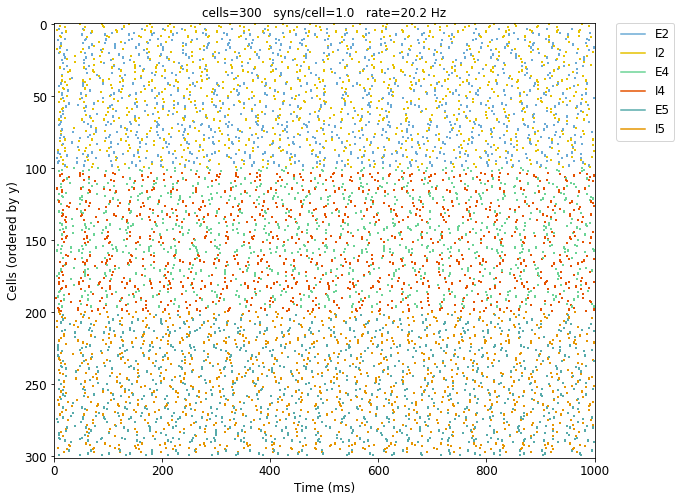

Plotting recorded cell traces ... cell


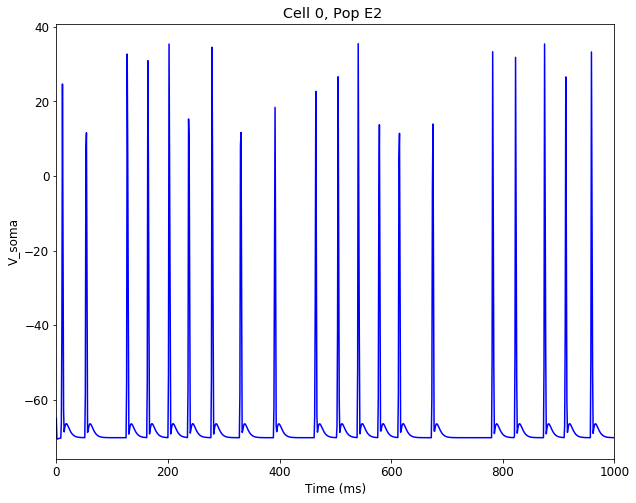

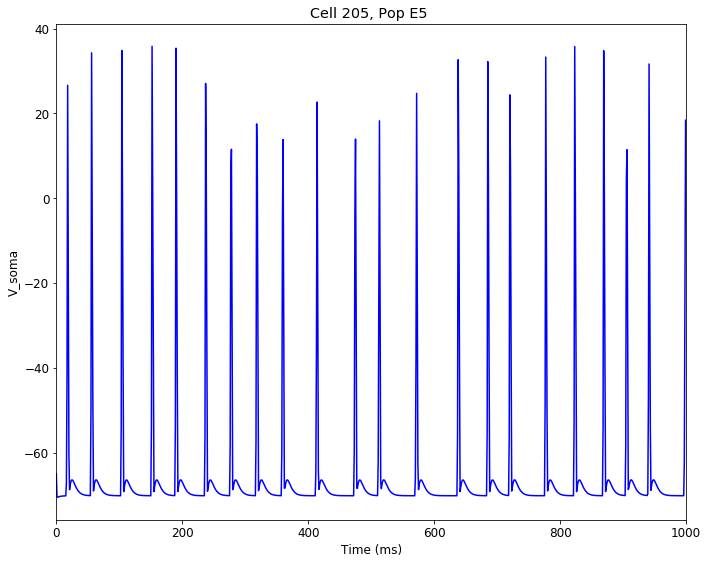

Plotting 2D representation of network cell locations and connections...


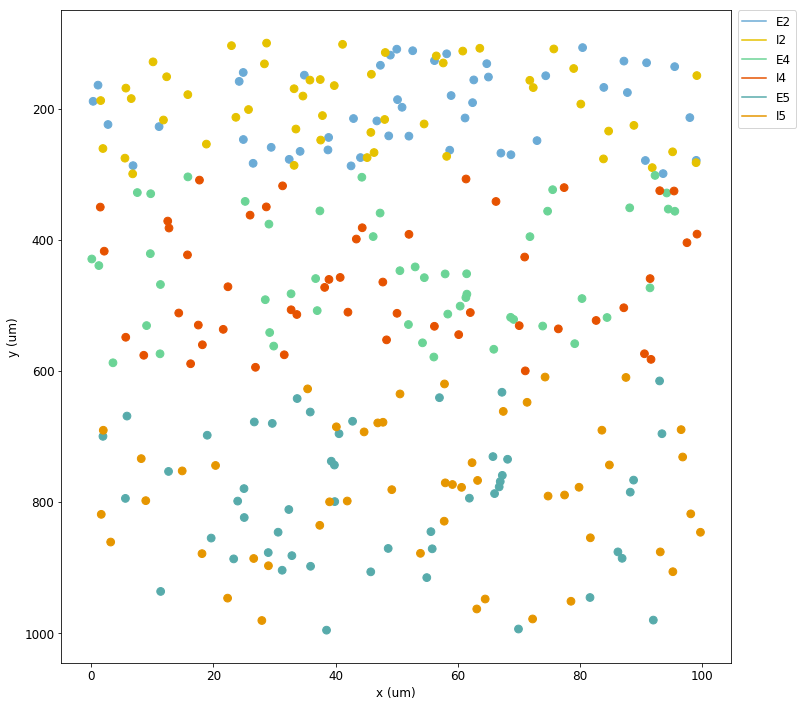

Plotting connectivity matrix...


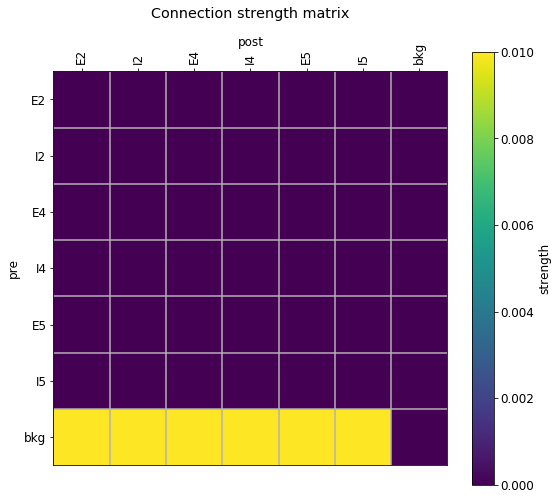

  Done; plotting time = 5.59 s

Total time = 10.65 s

End time:  2020-05-25 01:50:15.351831


In [7]:
# Simulation options
simConfig = specs.SimConfig()        # object of class SimConfig to store simulation configuration

simConfig.duration = 1*1e3           # Duration of the simulation, in ms
simConfig.dt = 0.05                 # Internal integration timestep to use
simConfig.verbose = False            # Show detailed messages
simConfig.recordTraces = {'V_soma':{'sec':'soma','loc':0.5,'var':'v'}}  # Dict with traces to record
simConfig.recordStep = 1             # Step size in ms to save data (e.g. V traces, LFP, etc)
simConfig.filename = 'model_output'  # Set file output name
simConfig.savePickle = False         # Save params, network and sim output to pickle file

simConfig.analysis['plotRaster'] = {'orderBy': 'y', 'orderInverse': True}      # Plot a raster
simConfig.analysis['plotTraces'] = {'include': [('E2',0),('E5', 5)]}      # Plot recorded traces for this list of cells
simConfig.analysis['plot2Dnet'] = True           # plot 2D visualization of cell positions and connections
simConfig.analysis['plotConn'] = True           # plot connectivity matrix

# Create network and run simulation
sim.createSimulateAnalyze(netParams = netParams, simConfig = simConfig)

# Step 3.2. Excitatory cells target all cells within a cortical depth of 100 and 1000 µm

<font size='3'>The delay is based on the distance between the cells (dist_3D) and the propagation velocity (propVelocity)

In [8]:
netParams.connParams['E->all'] = {
  'preConds': {'cellType': 'E'}, 'postConds': {'y': [100,1000]},  #  E -> all (100-1000 um)
  'probability': 0.1 ,                  # probability of connection
  'weight': '0.005*post_ynorm',         # synaptic weight
  'delay': 'dist_3D/propVelocity',      # transmission delay (ms)
  'synMech': 'exc'}                     # synaptic mechanism

## Run simulation


Start time:  2020-05-25 01:52:02.336418

Creating network of 6 cell populations on 1 hosts...
  Number of cells on node 0: 300 
  Done; cell creation time = 0.03 s.
Making connections...
  Number of connections on node 0: 4539 
  Done; cell connection time = 0.51 s.
Adding stims...
  Number of stims on node 0: 300 
  Done; cell stims creation time = 0.04 s.
Recording 2 traces of 1 types on node 0

Running simulation for 1000.0 ms...
  Done; run time = 11.14 s; real-time ratio: 0.09.

Gathering data...
  Done; gather time = 0.34 s.

Analyzing...
  Cells: 300
  Connections: 4839 (16.13 per cell)
  Spikes: 5017 (16.72 Hz)
  Simulated time: 1.0 s; 1 workers
  Run time: 11.14 s
  Done; saving time = 0.06 s.
Plotting raster...


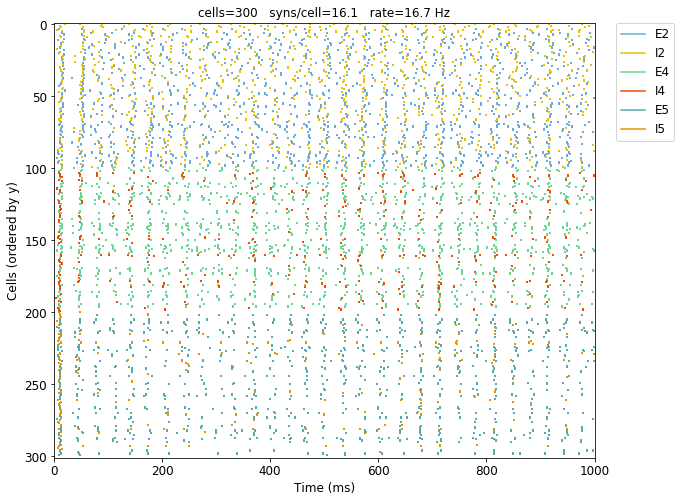

Plotting recorded cell traces ... cell


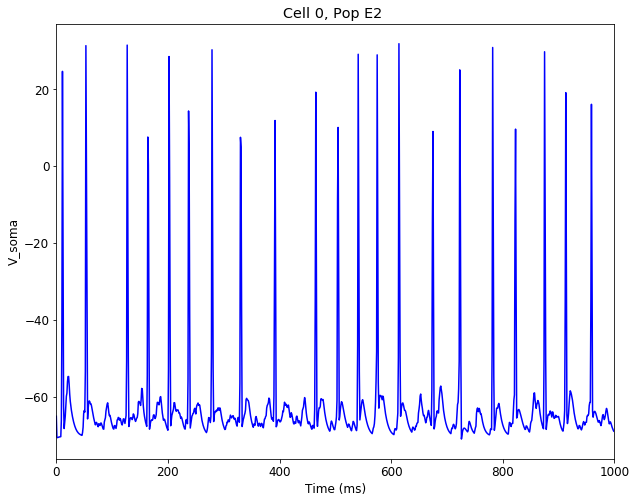

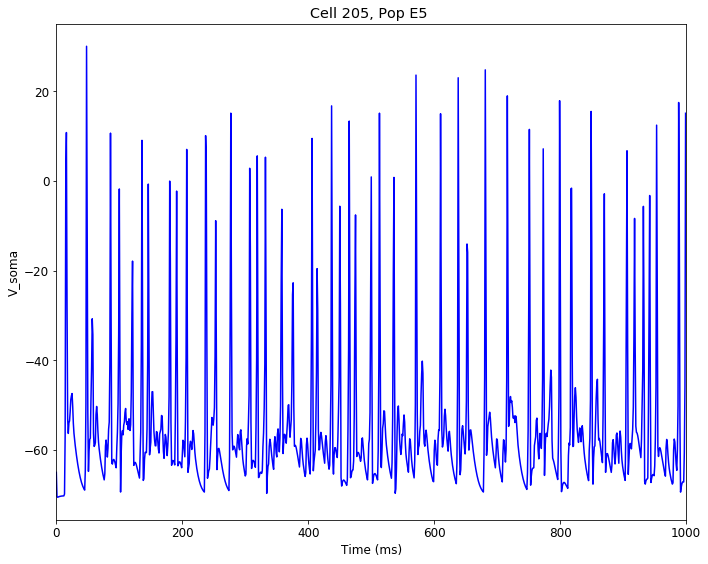

Plotting 2D representation of network cell locations and connections...


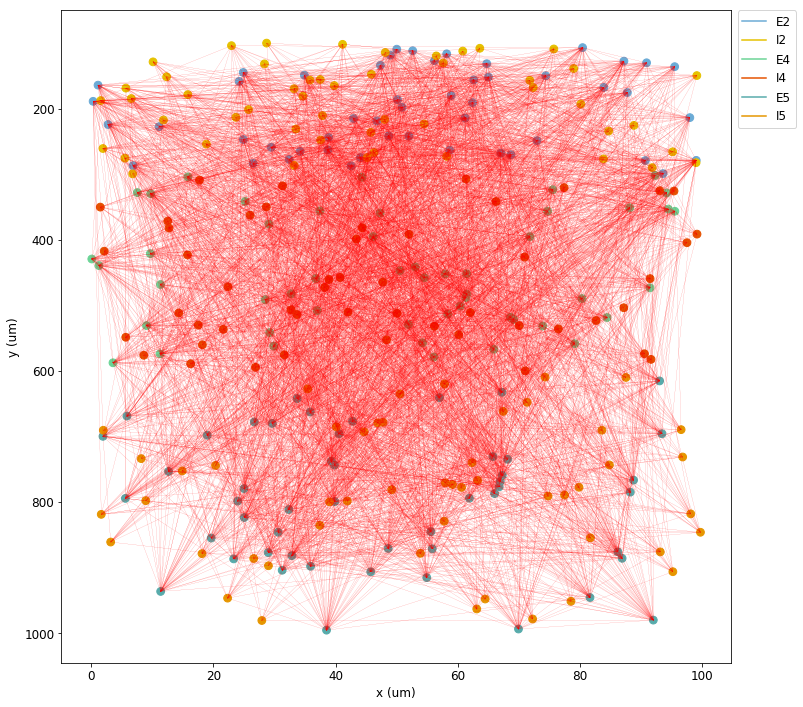

Plotting connectivity matrix...


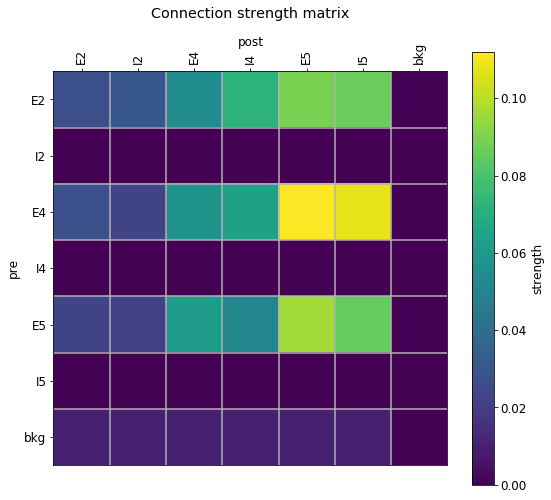

  Done; plotting time = 34.23 s

Total time = 46.36 s

End time:  2020-05-25 01:52:48.696036


In [9]:
# Simulation options
simConfig = specs.SimConfig()        # object of class SimConfig to store simulation configuration

simConfig.duration = 1*1e3           # Duration of the simulation, in ms
simConfig.dt = 0.05                 # Internal integration timestep to use
simConfig.verbose = False            # Show detailed messages
simConfig.recordTraces = {'V_soma':{'sec':'soma','loc':0.5,'var':'v'}}  # Dict with traces to record
simConfig.recordStep = 1             # Step size in ms to save data (e.g. V traces, LFP, etc)
simConfig.filename = 'model_output'  # Set file output name
simConfig.savePickle = False         # Save params, network and sim output to pickle file

simConfig.analysis['plotRaster'] = {'orderBy': 'y', 'orderInverse': True}      # Plot a raster
simConfig.analysis['plotTraces'] = {'include': [('E2',0), ('E5', 5)]}      # Plot recorded traces for this list of cells
simConfig.analysis['plot2Dnet'] = True           # plot 2D visualization of cell positions and connections
simConfig.analysis['plotConn'] = True           # plot connectivity matrix

# Create network and run simulation
sim.createSimulateAnalyze(netParams = netParams, simConfig = simConfig)

# Step 3.3: Adding inhibitory connections which will project only onto excitatory cells

<font size='3'>The probability of connection decay exponential as a function of distance with a given length constant 

In [10]:
netParams.connParams['I->E'] = {
  'preConds': {'cellType': 'I'}, 'postConds': {'pop': ['E2','E4','E5']},   #  I -> E
  'probability': '0.4*exp(-dist_3D/probLengthConst)',   # probability of connection
  'weight': 0.001,                                      # synaptic weight
  'delay': 'dist_3D/propVelocity',                      # transmission delay (ms)
  'synMech': 'inh'}                                     # synaptic mechanism

## Run simulation


Start time:  2020-05-25 01:52:49.120093

Creating network of 6 cell populations on 1 hosts...
  Number of cells on node 0: 300 
  Done; cell creation time = 0.03 s.
Making connections...
  Number of connections on node 0: 6796 
  Done; cell connection time = 0.90 s.
Adding stims...
  Number of stims on node 0: 300 
  Done; cell stims creation time = 0.04 s.
Recording 2 traces of 1 types on node 0

Running simulation for 1000.0 ms...
  Done; run time = 17.13 s; real-time ratio: 0.06.

Gathering data...
  Done; gather time = 0.37 s.

Analyzing...
  Cells: 300
  Connections: 7096 (23.65 per cell)
  Spikes: 4650 (15.50 Hz)
  Simulated time: 1.0 s; 1 workers
  Run time: 17.13 s
  Done; saving time = 0.05 s.
Plotting raster...


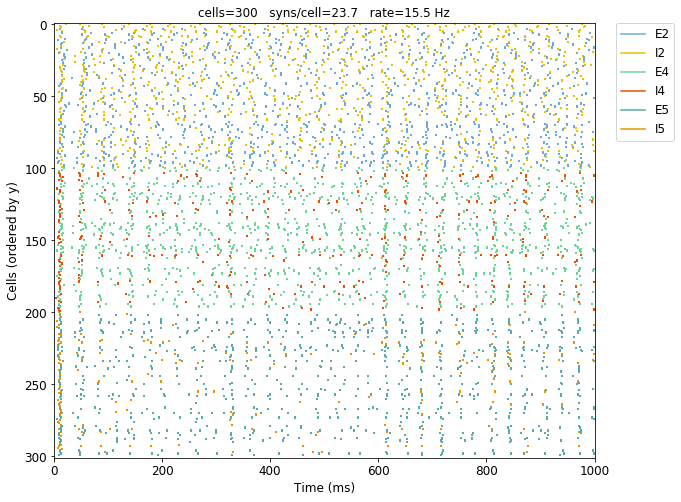

Plotting recorded cell traces ... cell


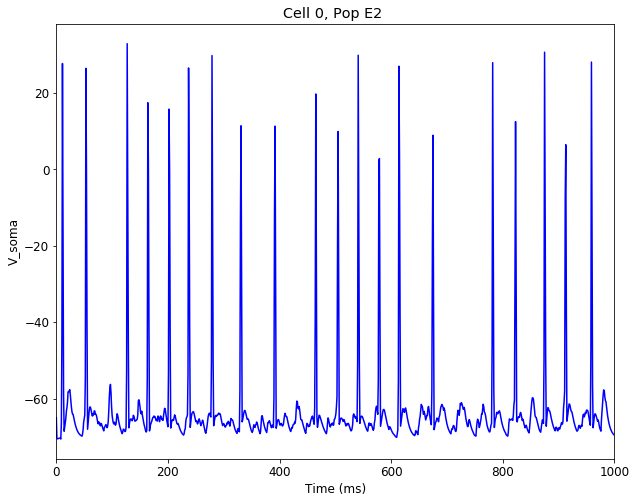

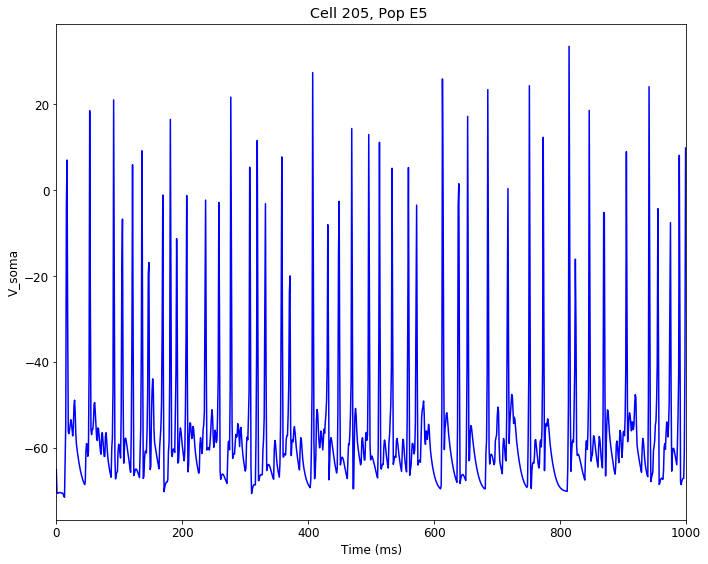

Plotting 2D representation of network cell locations and connections...


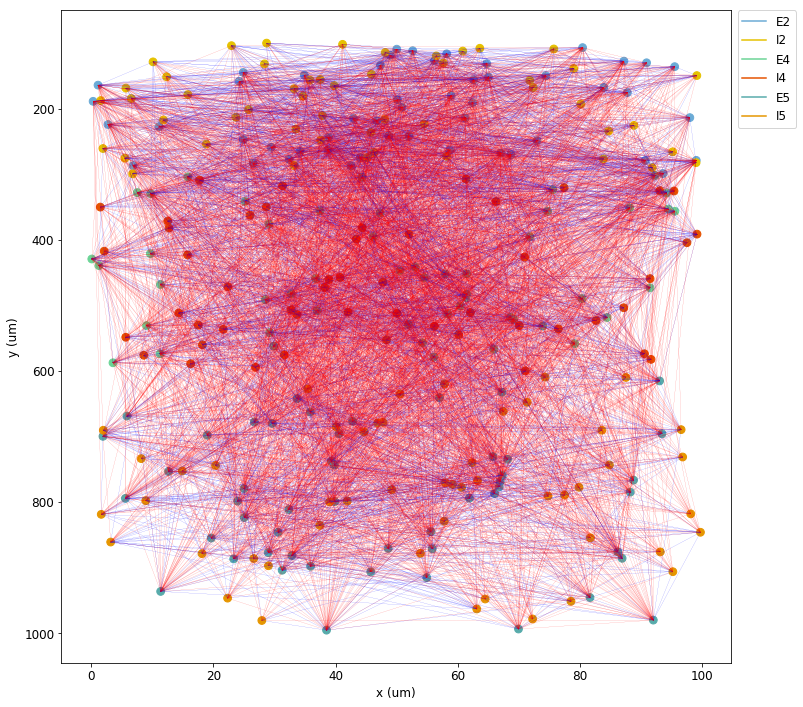

Plotting connectivity matrix...


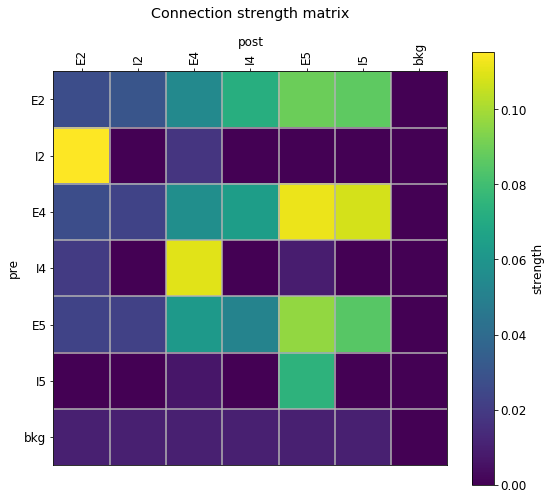

  Done; plotting time = 54.62 s

Total time = 73.17 s

End time:  2020-05-25 01:54:02.295383


In [11]:
# Simulation options
simConfig = specs.SimConfig()        # object of class SimConfig to store simulation configuration

simConfig.duration = 1*1e3           # Duration of the simulation, in ms
simConfig.dt = 0.05                 # Internal integration timestep to use
simConfig.verbose = False            # Show detailed messages
simConfig.recordTraces = {'V_soma':{'sec':'soma','loc':0.5,'var':'v'}}  # Dict with traces to record
simConfig.recordStep = 1             # Step size in ms to save data (e.g. V traces, LFP, etc)
simConfig.filename = 'model_output'  # Set file output name
simConfig.savePickle = False         # Save params, network and sim output to pickle file

simConfig.analysis['plotRaster'] = {'orderBy': 'y', 'orderInverse': True}      # Plot a raster
simConfig.analysis['plotTraces'] = {'include': [('E2',0), ('E5', 5)]}      # Plot recorded traces for this list of cells
simConfig.analysis['plot2Dnet'] = True           # plot 2D visualization of cell positions and connections
simConfig.analysis['plotConn'] = True           # plot connectivity matrix

# Create network and run simulation
sim.createSimulateAnalyze(netParams = netParams, simConfig = simConfig)